# TensorFlow Dropout Overfitting

In [1]:
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelBinarizer

/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Load data

In [50]:
digits = load_digits()
X = digits.data
X = X / X.max()
y = digits.target
y = LabelBinarizer().fit_transform(y)

## Train test split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

## Add layer function

In [52]:
def add_layer(inputs, in_size, out_size, keep_prob, activation_function=None):
    Weights = tf.Variable(tf.random_normal(shape=[in_size,out_size], dtype=tf.float32))
    biases  = tf.Variable(tf.zeros(shape=[1, out_size], dtype=tf.float32)+0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    
    # Dropout here
    Wx_plus_b = tf.nn.dropout(Wx_plus_b, keep_prob)
    
    if activation_function is None:
        return Wx_plus_b
    else:
        return activation_function(Wx_plus_b)

## Build neural network

In [53]:
xs = tf.placeholder(shape=[None, 64], dtype=tf.float32, name='data')
ys = tf.placeholder(shape=[None, 10], dtype=tf.float32, name='target')

# Dropout keep prob
keep_prob = tf.placeholder(dtype=tf.float32)

hidden_layer = add_layer(xs,           64, 32, keep_prob, tf.nn.tanh)
prediction   = add_layer(hidden_layer, 32, 10, keep_prob, tf.nn.softmax)

## Loss and train step

In [54]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(ys*tf.log(prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.6).minimize(cross_entropy)

## Start Training

Step 0 ------------
Train loss: 4.52247
Test  loss: 4.27316
Step 50 ------------
Train loss: 0.519279
Test  loss: 0.621414
Step 100 ------------
Train loss: 0.298374
Test  loss: 0.389788
Step 150 ------------
Train loss: 0.23237
Test  loss: 0.312131
Step 200 ------------
Train loss: 0.197495
Test  loss: 0.273861
Step 250 ------------
Train loss: 0.173118
Test  loss: 0.242986
Step 300 ------------
Train loss: 0.159144
Test  loss: 0.225545
Step 350 ------------
Train loss: 0.147115
Test  loss: 0.203126
Step 400 ------------
Train loss: 0.136872
Test  loss: 0.1958
Step 450 ------------
Train loss: 0.128238
Test  loss: 0.186488
--------------------------


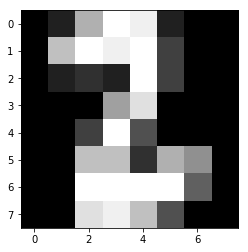

Prediction: 2


In [58]:
with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    
    for i in range(500):
        sess.run(train_step, feed_dict={xs: X_train, ys: y_train, keep_prob: 0.6})
        if i % 50 == 0:
            print("Step", i, '------------')
            print('Train loss:', sess.run(cross_entropy, feed_dict={xs: X_train, ys: y_train, keep_prob: 1} ))
            print('Test  loss:', sess.run(cross_entropy, feed_dict={xs: X_test,  ys: y_test , keep_prob: 1} ))
            
    import matplotlib.pyplot as plt
    import numpy as np
    
    print('--------------------------')
    
    i = np.random.randint(0, X_train.shape[0])
    
    plt.imshow(X_train[i].reshape(8,8), cmap='gray')
    plt.show()
    
    print('Prediction:', np.argmax(sess.run(prediction, feed_dict={xs: X_train[i][np.newaxis,:], keep_prob: 1})))